In [164]:
# importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import dash
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import missingno as msno
import functions
# stops python from showing scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [165]:

df['view'].value_counts(dropna=False)


NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
NaN             63
Name: view, dtype: int64

In [166]:
df['view'].replace({ 'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 5}, inplace=True)

In [167]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,0.00,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,0.00,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,0.00,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,0.00,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,0.00,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,0.00,...,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,0.00,...,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,0.00,...,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,NaN,0.00,...,8 Good,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


In [168]:
ll_df = df[['lat', 'long']]
df = df.drop(columns=['sqft_living15', 'sqft_lot15', 'sqft_basement', 'sqft_above', 'grade', 'sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'id', 'date', 'floors', 'waterfront', 'long', 'lat', 'yr_renovated']).set_index(df['id'])

In [169]:
df['condition'].replace({ 'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}, inplace=True)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      21597 non-null  float64
 1   view       21534 non-null  float64
 2   condition  21597 non-null  int64  
 3   yr_built   21597 non-null  int64  
 4   zipcode    21597 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1012.4 KB


In [171]:
df.describe()

,price,view,condition,yr_built,zipcode
count,21597.00,21534.00,21597.00,21597.00,21597.00
mean,540296.57,0.25,2.41,1971.00,98077.95
std,367368.14,0.84,0.65,29.38,53.51
min,78000.00,0.00,0.00,1900.00,98001.00
25%,322000.00,0.00,2.00,1951.00,98033.00
50%,450000.00,0.00,2.00,1975.00,98065.00
75%,645000.00,0.00,3.00,1997.00,98118.00
max,7700000.00,5.00,4.00,2015.00,98199.00


In [172]:
df.dropna(how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      21534 non-null  float64
 1   view       21534 non-null  float64
 2   condition  21534 non-null  int64  
 3   yr_built   21534 non-null  int64  
 4   zipcode    21534 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1009.4 KB


In [173]:
df['view'].dropna(how='any',inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      21534 non-null  float64
 1   view       21534 non-null  float64
 2   condition  21534 non-null  int64  
 3   yr_built   21534 non-null  int64  
 4   zipcode    21534 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1009.4 KB


In [174]:
# getting rid of outliners before copy is made
Q1 = df['price'].quantile(0.0005)
Q3 = df['price'].quantile(0.99)
IQR = Q3 - Q1

df = df[df['price'] > Q1]
df = df[df['price'] < Q3]

df.describe()

,price,view,condition,yr_built,zipcode
count,21307.00,21307.00,21307.00,21307.00,21307.00
mean,518442.10,0.23,2.41,1971.00,98078.07
std,284552.13,0.79,0.65,29.31,53.46
min,89950.00,0.00,0.00,1900.00,98001.00
25%,320000.00,0.00,2.00,1952.00,98033.00
50%,450000.00,0.00,2.00,1975.00,98065.00
75%,635000.00,0.00,3.00,1997.00,98118.00
max,1960000.00,5.00,4.00,2015.00,98199.00


In [175]:
# make duplicate 
dum_df = df.copy()

In [176]:
enc = OrdinalEncoder()
df[['enc_view', 'enc_condition']] = enc.fit_transform(df[['view', 'condition']])

In [177]:
#df = df[df["view"].str.contains("NONE")==False]
df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00
mean,518442.10,0.23,2.41,1971.00,98078.07,0.22,2.41
std,284552.13,0.79,0.65,29.31,53.46,0.73,0.65
min,89950.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,320000.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,450000.00,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,635000.00,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1960000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


In [178]:
df['enc_view'].value_counts()

0.00    19336
2.00      927
3.00      479
1.00      316
4.00      249
Name: enc_view, dtype: int64

In [179]:
df['view'].value_counts(dropna=False)
df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00
mean,518442.10,0.23,2.41,1971.00,98078.07,0.22,2.41
std,284552.13,0.79,0.65,29.31,53.46,0.73,0.65
min,89950.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,320000.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,450000.00,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,635000.00,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1960000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


In [180]:
df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00
mean,518442.10,0.23,2.41,1971.00,98078.07,0.22,2.41
std,284552.13,0.79,0.65,29.31,53.46,0.73,0.65
min,89950.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,320000.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,450000.00,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,635000.00,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1960000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


In [181]:

df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00
mean,518442.10,0.23,2.41,1971.00,98078.07,0.22,2.41
std,284552.13,0.79,0.65,29.31,53.46,0.73,0.65
min,89950.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,320000.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,450000.00,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,635000.00,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1960000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


In [182]:
df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00
mean,518442.10,0.23,2.41,1971.00,98078.07,0.22,2.41
std,284552.13,0.79,0.65,29.31,53.46,0.73,0.65
min,89950.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,320000.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,450000.00,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,635000.00,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1960000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


In [183]:
df_matrix = df.corr()
df_matrix['price']

price            1.00
view             0.34
condition        0.03
yr_built         0.06
zipcode         -0.05
enc_view         0.34
enc_condition    0.03
Name: price, dtype: float64

In [184]:
df['view'].value_counts()

0.00    19336
2.00      927
3.00      479
1.00      316
5.00      249
Name: view, dtype: int64

In [185]:
#Q1 = df['price'].quantile(0.003)
#Q3 = df['price'].quantile(0.99)
#IQR = Q3 - Q1

#df = df[df['price'] > Q1]
#df = df[df['price'] < Q3]

df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00
mean,518442.10,0.23,2.41,1971.00,98078.07,0.22,2.41
std,284552.13,0.79,0.65,29.31,53.46,0.73,0.65
min,89950.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,320000.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,450000.00,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,635000.00,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1960000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


(array([3464., 7733., 5144., 2603., 1168.,  457.,  312.,  193.,  140.,
          93.]),
 array([  89950.,  276955.,  463960.,  650965.,  837970., 1024975.,
        1211980., 1398985., 1585990., 1772995., 1960000.]),
 <BarContainer object of 10 artists>)

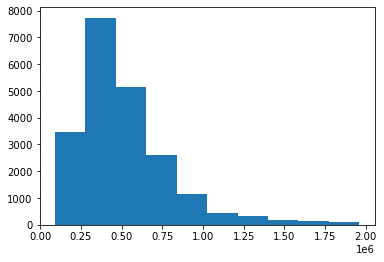

In [186]:
plt.hist(df['price'])

In [187]:
df_matrix = df.corr()
df_matrix['price']

price            1.00
view             0.34
condition        0.03
yr_built         0.06
zipcode         -0.05
enc_view         0.34
enc_condition    0.03
Name: price, dtype: float64

In [188]:
#X = df.drop(columns=['price'])
#y = df['price']

# Train / Test split
#X_train, X_test, y_train, y_test = train_test_split(
    #X, y, test_size=0.25)

#model = sm.OLS(y_train, sm.add_constant(X_train['view'])).fit()
#model.summary()

In [189]:
#train_preds = model.predict(sm.add_constant(X_train['view']))
#test_preds = model.predict(sm.add_constant(X_test['view']))
#functions.evaluate(y_train, train_preds, y_test, test_preds)

In [190]:

# Let's also check the assumptions of linearity.
#functions.check_assumptions(X_train['view'], y_train, train_preds, test_preds, y_test)

In [191]:
df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00
mean,518442.10,0.23,2.41,1971.00,98078.07,0.22,2.41
std,284552.13,0.79,0.65,29.31,53.46,0.73,0.65
min,89950.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,320000.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,450000.00,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,635000.00,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1960000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


In [192]:
df.shape

(21307, 7)

In [193]:
dum_df = pd.get_dummies(data=dum_df, columns=['view'], drop_first=True)
dum_df.head()

,price,condition,yr_built,zipcode,view_1.0,view_2.0,view_3.0,view_5.0
id,,,,,,,,
7129300520,221900.00,2,1955,98178,0,0,0,0
6414100192,538000.00,2,1951,98125,0,0,0,0
5631500400,180000.00,2,1933,98028,0,0,0,0
2487200875,604000.00,4,1965,98136,0,0,0,0
1954400510,510000.00,2,1987,98074,0,0,0,0


In [194]:
dum_df = pd.get_dummies(data=dum_df, columns=['condition'], drop_first=True)

In [195]:
dum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21307 entries, 7129300520 to 1523300157
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21307 non-null  float64
 1   yr_built     21307 non-null  int64  
 2   zipcode      21307 non-null  int64  
 3   view_1.0     21307 non-null  uint8  
 4   view_2.0     21307 non-null  uint8  
 5   view_3.0     21307 non-null  uint8  
 6   view_5.0     21307 non-null  uint8  
 7   condition_1  21307 non-null  uint8  
 8   condition_2  21307 non-null  uint8  
 9   condition_3  21307 non-null  uint8  
 10  condition_4  21307 non-null  uint8  
dtypes: float64(1), int64(2), uint8(8)
memory usage: 832.3 KB


In [196]:
dum_df = pd.get_dummies(data=dum_df, columns=['zipcode'], drop_first=True)

In [197]:
dum_df_matrix = dum_df.corr()
dum_df_matrix['price']

price            1.00
yr_built         0.06
view_1.0         0.09
view_2.0         0.16
view_3.0         0.19
                 ... 
zipcode_98177    0.04
zipcode_98178   -0.08
zipcode_98188   -0.06
zipcode_98198   -0.09
zipcode_98199    0.10
Name: price, Length: 79, dtype: float64

In [198]:
dum_df['price'].describe()

count     21307.00
mean     518442.10
std      284552.13
min       89950.00
25%      320000.00
50%      450000.00
75%      635000.00
max     1960000.00
Name: price, dtype: float64

In [199]:
#plt.bascatterr(x='view', height='price', data=df)

In [202]:
X = dum_df.drop(columns=['price'])
y = dum_df['price']

# Train / Test split\


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

#model= sm.OLS(dum_y_train, sm.add_constant(dum_X_train['view_5.0'])).fit()
#model.summary()

reg = LinearRegression()
reg.fit(X_train, y_train)

dum_y_prediction = reg.predict(X_test)
dum_y_prediction



array([590669.36944389, 604084.98081548, 607408.84860464, ...,
       825250.92505137, 303945.47101676, 643360.88763201])

In [204]:
train_df = X_train.merge(y_train, how='outer', left_index=True, right_index=True)
train_pred = X_train.merge(y_train, how='outer', left_index=True, right_index=True)


fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, )
plt.show()

    # Check for residual normality
train_residuals = y_train - train_preds
sm.qqplot(train_residuals, line='r');
test_residuals = y_test - test_preds
sm.qqplot(test_residuals, line='r');

 # Checking heteroskedacity
plt.scatter(train_preds, train_residuals, label='Train')
plt.scatter(test_preds, test_residuals, label='Test')

plt.axhline(y=0, color='red', label='0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend()
plt.show()

In [ ]:
#print(reg.intercept_)
#print(reg.coef_)
#mean_squared_error(dum_y_train, dum_y_prediction)


#functions.evaluate(dum_y_train , dum_y_test, dum_y_prediction, dum_y_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(dum_y_test, dum_y_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(dum_y_test, dum_y_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(dum_y_test, dum_y_prediction)))


score=r2_score(dum_y_test,dum_y_prediction)
print('r2 score is ',score)
#print('mean_sqrd_error is==',mean_squared_error(dum_y_test,dum_y_prediction))
#print('root_mean_squared error of is==',np.sqrt(mean_squared_error(dum_y_test,dum_y_prediction)))

In [ ]:
# For comparing the models, let's also use our evaluate() function to get R2, RMSE, MAE
#dum_train_preds = model.predict(sm.add_constant(dum_X_train))
#dum_test_preds = model.predict(sm.add_constant(dum_X_test))
#functions.evaluate(dum_y_train, train_preds, dum_y_test, test_preds)

In [ ]:
#functions.check_assumptions(dum_X_train['view_5.0'], dum_y_train, dum_train_preds, dum_test_preds, dum_y_test)

In [ ]:
coeff_df = pd.DataFrame(reg.coef_, dum_X_train.columns, columns=['Coefficient'])
coeff_df

In [ ]:
compare_df = pd.DataFrame({'actual': dum_y_test, 'Predicted': dum_y_prediction})
compare_df

In [ ]:
#sns.lmplot(x='view', y='price', data=dum_df)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(dum_y_test, dum_y_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(dum_y_test, dum_y_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(dum_y_test, dum_y_prediction)))

In [ ]:
dum_df.columns

In [ ]:

df.columns

In [ ]:
formula = 'price ~ zipcode+view+condition'
model = ols(formula=formula, data=df).fit()

model.summary()

In [ ]:
df.describe()

In [ ]:
sdf = df.groupby('zipcode')['price'].mean()
sdf.sort_values(ascending=False)

In [ ]:


fig = px.scatter_mapbox(_df,
                        lat='lat',
                        lon='long',
                        color='price',
                        zoom=8)
fig.update_layout(mapbox_style='open-street-map')

fig.show()

In [ ]:
sdf = sdf.reset_index()

In [ ]:
sdf.sort_index(ascending=False)

In [ ]:
sX = sdf['zipcode']
sy = sdf['price']

sX_train, sX_test, sy_train, sy_test = train_test_split(
    sX, sy, test_size=0.33)

smodel = sm.OLS(sy_train, sm.add_constant(sX_train)).fit()
smodel.summary()

In [ ]:
fig = px.scatter_mapbox(filt_df,
                        lat='lat',
                        lon='long',
                        color='price',
                        zoom=8)
fig.update_layout(mapbox_style='open-street-map')

fig.show()